In [14]:
import numpy as np
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt


[UChicago-Stat Lecture WLS](https://www.stat.uchicago.edu/~yibi/teaching/stat224/L14.pdf)

In [2]:
df = pd.read_csv("data/SupervisorEmployee.csv")
df.head()

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


In [23]:
Y = np.log(df.Y)
X = np.log(df.X)

model_OLS = sm.OLS(Y, sm.add_constant(X)).fit(cov_type='HC1')

predictions_OLS = model_OLS.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals_OLS = Y - predictions_OLS['mean']

model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           5.87e-12
Time:                        11:37:23   Log-Likelihood:                 8.8218
No. Observations:                  27   AIC:                            -13.64
Df Residuals:                      25   BIC:                            -11.05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4846      0.477     -3.109      0.002      -2.420      -0.549
X              0.9092      0.075     12.114      0.000       0.762       1.056
==============================================================================
Omnibus:                        2.274   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.257
Skew:                          -0.167   Prob(JB):                        0.533
Kurtosis:                       1.997   Cond. No.                         83.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [52]:
Y = df.Y
X = df.X

w = 1/X**2
# Calculate weights based on the inverse of the variance of the errors
model_WLS = sm.WLS(Y, sm.add_constant(X), weights=w).fit()

predictions_WLS = model_WLS.get_prediction(sm.add_constant(X), weights=w).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals_WLS = Y - predictions_WLS['mean']

model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.879
Model:                            WLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     180.8
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           6.04e-13
Time:                        12:33:48   Log-Likelihood:                -110.64
No. Observations:                  27   AIC:                             225.3
Df Residuals:                      25   BIC:                             227.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8033      4.570      0.832      0.413      -5.608      13.215
X              0.1210      0.009     13.445      0.000       0.102       0.140
==============================================================================
Omnibus:                        2.914   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.324
Skew:                          -0.035   Prob(JB):                        0.516
Kurtosis:                       1.918   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
rss = (w*(Y-model_WLS.fittedvalues)**2).sum()
weighted_mean_Y = np.sum(w * Y) / np.sum(w)
tss = (w*(Y-weighted_mean_Y)**2).sum()

r2 = 1 - (rss/tss) 

mse = rss/(25)
np.sqrt(mse) #Residual Standard Error #Sigma

0.022664789329268655

In [54]:
np.sqrt(mse/w) #Different variances

0      6.663448
1      5.598203
2      6.051499
3      8.113995
4      9.587206
5      7.048749
6     10.199155
7     12.102998
8      9.927178
9     15.797358
10    15.593375
11    14.278817
12    16.069336
13    14.210823
14    13.938845
15    22.642125
16    23.163415
17    23.004761
18    15.865353
19    19.265071
20    22.211494
21    23.231409
22    23.140750
23    27.197747
24    28.330987
25    33.997184
26    37.396902
Name: X, dtype: float64

In [55]:
predictions_WLS

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,39.374445,2.594763,34.030432,44.718459,24.647041,54.101850
1,33.687901,2.838096,27.842733,39.533069,20.761172,46.614630
2,36.107707,2.729196,30.486823,41.728592,22.435543,49.779871
3,47.117825,2.346887,42.284320,51.951330,29.721759,64.513891
4,54.982195,2.223242,50.403342,59.561047,34.713016,75.251374
5,41.431281,2.518477,36.244380,46.618181,26.015308,56.847253
6,58.248933,2.215677,53.685661,62.812205,36.753428,79.744438
7,68.412119,2.357916,63.555899,73.268338,43.016888,93.807350
8,56.797049,2.215756,52.233615,61.360484,35.848552,77.745546
9,88.133538,3.175262,81.593965,94.673112,54.947552,121.319525


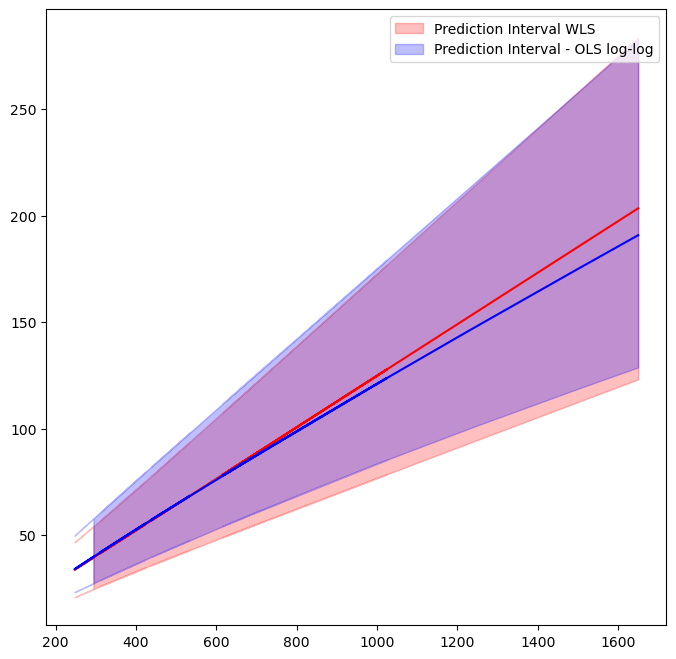

In [58]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
#ax.scatter(df['price']/1000000, predictions_WLS['obs_ci_lower'], color="red", )
#ax.scatter(df['price']/1000000, predictions_WLS['obs_ci_upper'], color="red", )
ax.plot(df.X,model_WLS.fittedvalues, color="red" )
ax.plot(df.X, np.exp(model_OLS.fittedvalues), color="blue" )

# Fill area when income <= df['expenses'] with red

ax.fill_between(
    df.X, predictions_WLS['obs_ci_lower'], predictions_WLS['obs_ci_upper'],
    where=(predictions_WLS['obs_ci_lower'] <= predictions_WLS['obs_ci_upper']), 
    interpolate=True, color="red", alpha=0.25,
    label="Prediction Interval WLS"
)

# Plot lines
#ax.scatter(df['price']/1000000, np.exp(predictions_OLS['obs_ci_lower'])/1000000, color="blue", )
#ax.scatter(df['price']/1000000, np.exp(predictions_OLS['obs_ci_upper'])/1000000, color="blue", )

# Fill area when income <= df['expenses'] with red
# ax.fill_between(
#     df.X, predictions_OLS['obs_ci_lower'], predictions_OLS['obs_ci_upper'],
#     where=(predictions_OLS['obs_ci_lower']<= predictions_OLS['obs_ci_upper']), 
#     interpolate=True, color="blue", alpha=0.25,
#     label="Prediction Interval - OLS"
# )

ax.fill_between(
    df.X, np.exp(predictions_OLS['obs_ci_lower']), np.exp(predictions_OLS['obs_ci_upper']),
    where=(np.exp(predictions_OLS['obs_ci_lower'])<= np.exp(predictions_OLS['obs_ci_upper'])), 
    interpolate=True, color="blue", alpha=0.25,
    label="Prediction Interval - OLS log-log"
)

ax.legend()
plt.show()

In [76]:
residuals_WLS =  Y - model_WLS.fittedvalues
weighted_residuals_WLS = w * residuals_WLS
Var_e = mse/w
def internally_studentized_residual(X,Y,Var_e, residuals):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    
    SE_regression = (Var_e * (1-h_ii)) ** 0.5
    studentized_residuals = residuals/SE_regression
    return studentized_residuals

studentized_residuals = internally_studentized_residual(X, Y, Var_e, residuals_WLS)

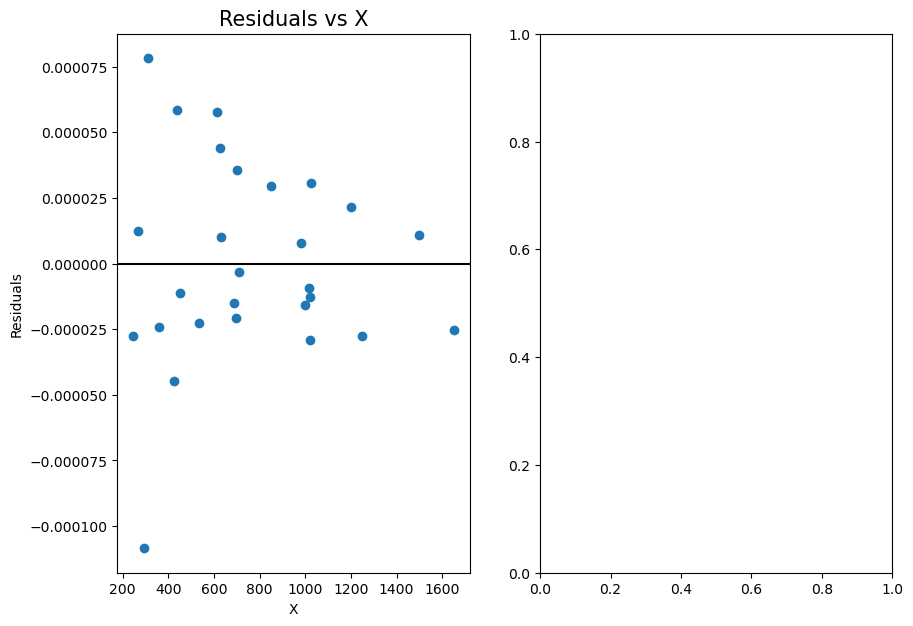

In [83]:
fig, ax = plt.subplots(1,2, figsize=(10,7))
axes = ax.flatten()
axes[0].scatter(x=X, y=weighted_residuals_WLS)
axes[0].set_title('Residuals vs X', fontsize=15)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='black')

# for idx, predictor in enumerate(['X']):
#     axes[idx+1].scatter(x=df[predictor], y=residuals_OLS)
#     axes[idx+1].set_title('Residuals vs {}'.format(predictor), fontsize=15)
#     axes[idx+1].set_xlabel('{}'.format(predictor))
#     axes[idx+1].set_ylabel('Residuals')
#     axes[idx+1].axhline(y=0, color='black')

plt.show()